In [1]:
import torch
from torch.utils.data import DataLoader
from dataset import WeatherBenchDataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
BATCH_SIZE = 1

data = torch.load('/vol/bitbucket/nb324/ERA5_64x32_daily_850.pt')
n_samples = data.shape[0]
n_train = int(n_samples * 0.6)

train_data = data[:n_train]

mean = train_data.mean(dim=(0, 2, 3), keepdim=True)
std = train_data.std(dim=(0, 2, 3), keepdim=True)
train_data = (train_data - mean) / std
train_dataset = WeatherBenchDataset(data=train_data, augment_sample_random_mask=0.7)
trainloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
)

In [6]:
batch = next(iter(trainloader))

X = batch[0][0]
X_prime = batch[1][0]

X = X[1, :, :].T
X_prime = X_prime[1, :, :].T


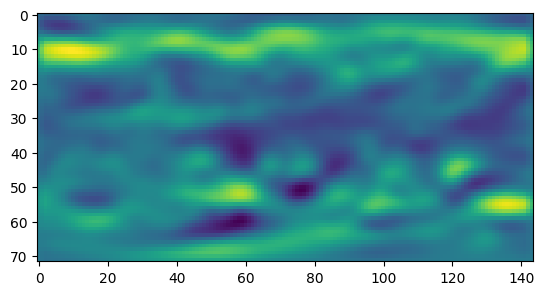

In [7]:
cmap='plasma'
# X = plt.get_cmap(cmap)(X)[:, :, :3]
plt.imshow(X)

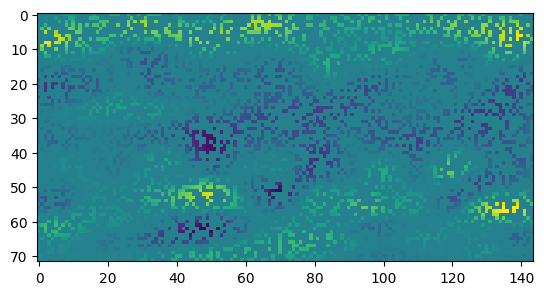

In [8]:
cmap='plasma'
# X_prime = plt.get_cmap(cmap)(X_prime)[:, :, :3]
plt.imshow(X_prime)